In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
ds=pd.read_csv("BostonHousing.csv")

In [3]:
print(ds)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


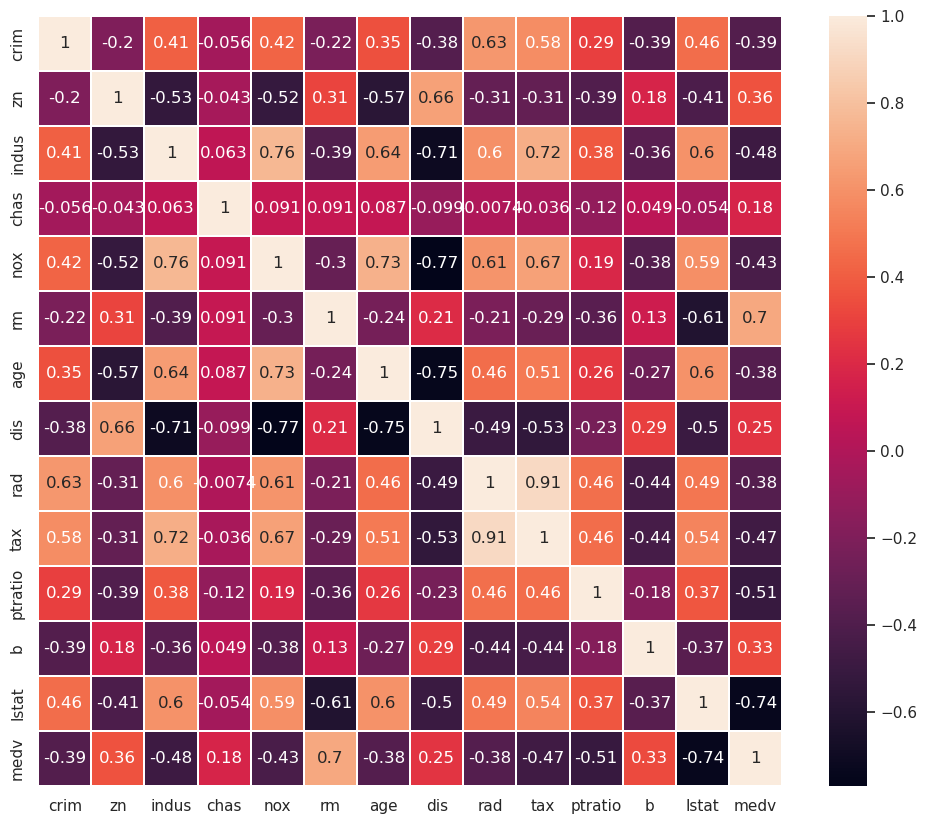

In [5]:
sns.set (rc = {'figure.figsize':(12, 10)})
sns.heatmap(ds.corr(),linewidth=.3,annot=True)
plt.show()

In [6]:
X = ds[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
Y = ds['medv']


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [8]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [10]:
print(y_pred)

[30.77834822 38.66581541 16.96705276 26.79035818 20.36068008 24.89386356
 18.98948959 15.44554414 24.50205701 22.12455513 27.16709892 20.60218969
 -4.91312377 23.45520373 20.44300739 27.97454642 21.82481134  6.80793603
 43.13876668 19.08804672 28.93737925 31.91943808 12.05148619 25.41493356
 19.60614164 17.23543021 24.61263361 16.907528   24.25623469 20.73183868
 23.98650325 26.66317526 27.45468242 19.57475267 18.15660164 19.94422395
 33.04896681 21.26475982 25.83570427 26.36436267 15.22545112 33.61610719
 45.24385042 18.83620774 28.91584593 18.49470905 14.91054896 27.65199578
 21.75498681 32.36964545 23.36168054 36.5955736  16.82098601 27.59874838
 42.39261672 24.39945725 20.42785358 34.46608842 26.52068304 14.0304141
 24.03170468 32.40960974 33.59067192 17.33583061 22.46180876 18.28308242
 22.01801285 27.57486429 32.54366102 13.95067422 21.96577449 29.21079363
 12.65101384 17.15704754 25.56951945  6.99478235 22.73334313 43.93983367
 20.03571324 10.919632   22.50309934 14.46771561 23.

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mead squared Error is:")
print(rmse)


Root Mead squared Error is:
4.912717301969202


In [12]:
print("Training accuracy is:")
lr.score(X_train, y_train)


Training accuracy is:


0.7434997532004697

In [13]:
print("Testing accuracy is:")
lr.score(X_test, y_test)


Testing accuracy is:


0.6761000049033605

In [14]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64


<AxesSubplot:xlabel='medv', ylabel='Count'>

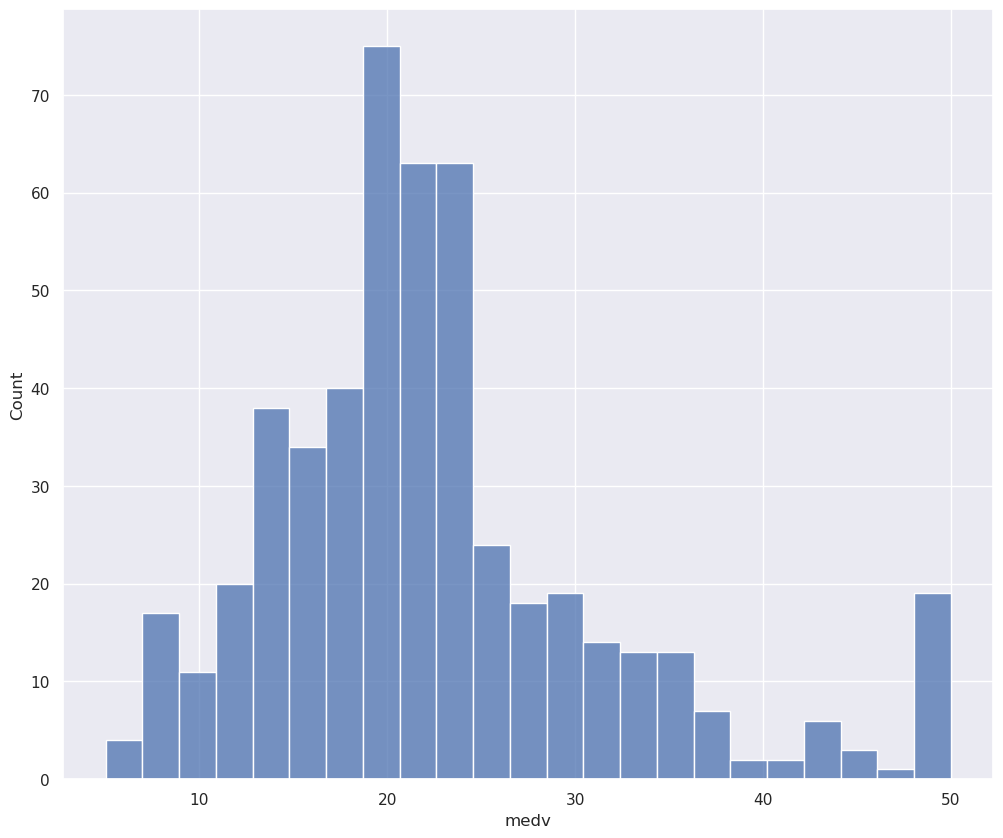

In [15]:
sns.histplot(x='medv',data=ds)

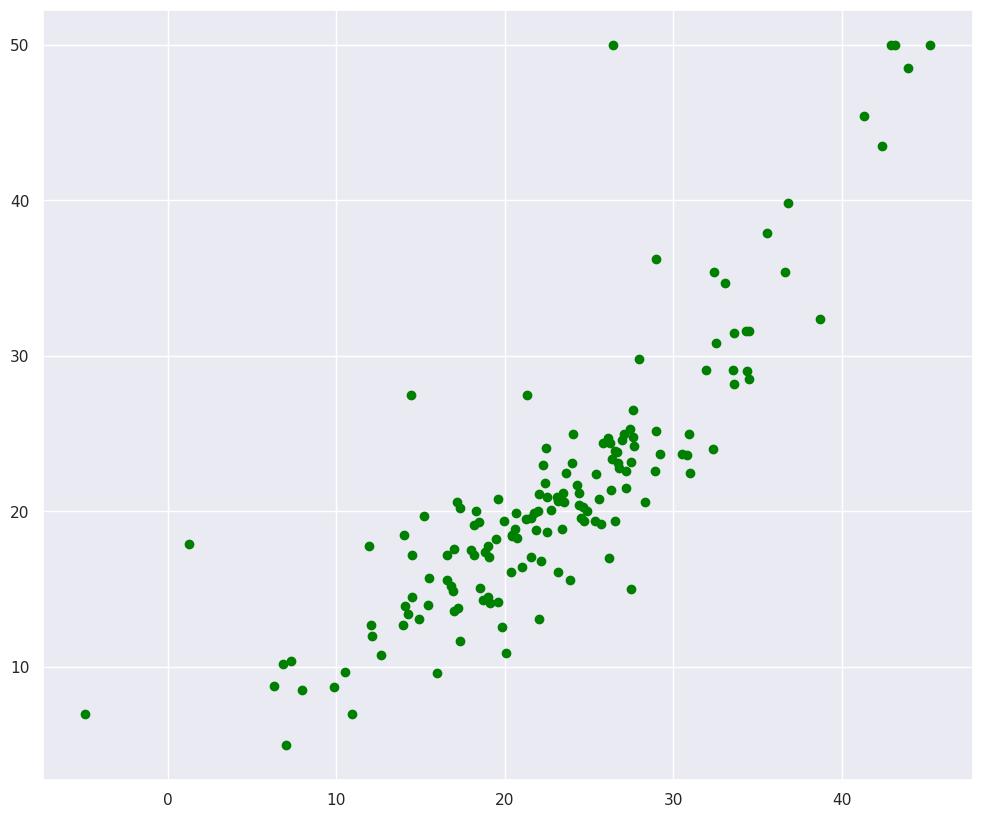

In [16]:
plt.scatter(y_pred, y_test, c = 'green')

<AxesSubplot:xlabel='rm', ylabel='medv'>

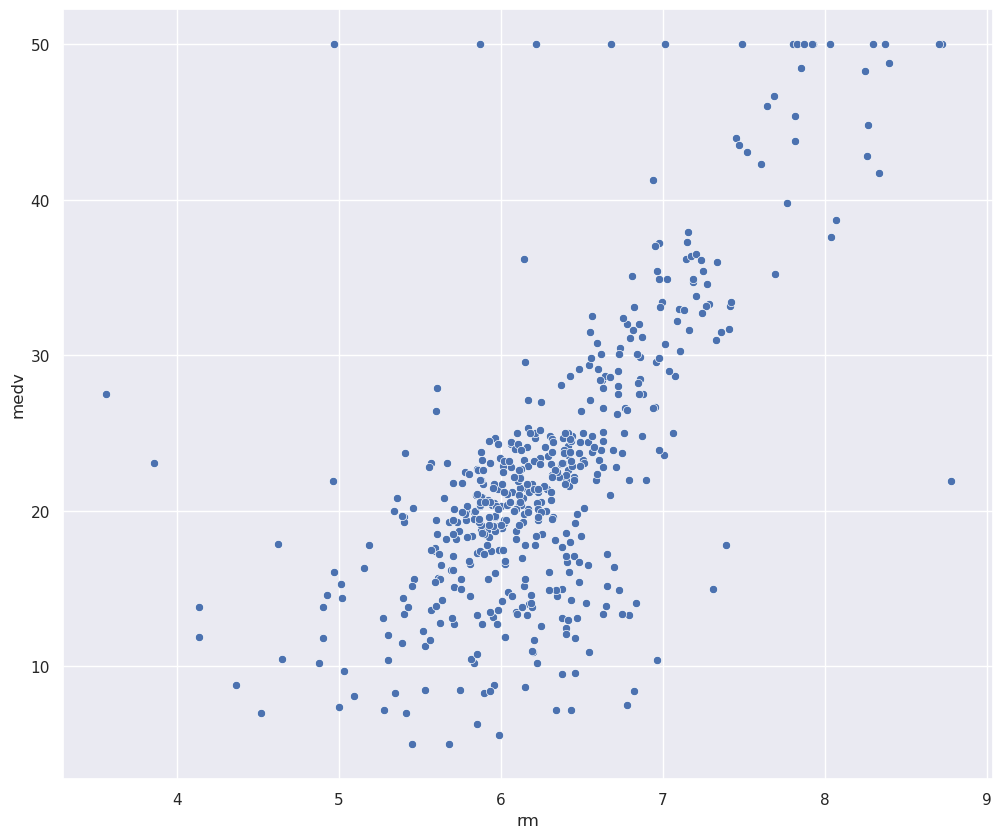

In [20]:
sns.scatterplot(x='rm',y='medv',data=ds)

<AxesSubplot:xlabel='zn', ylabel='medv'>

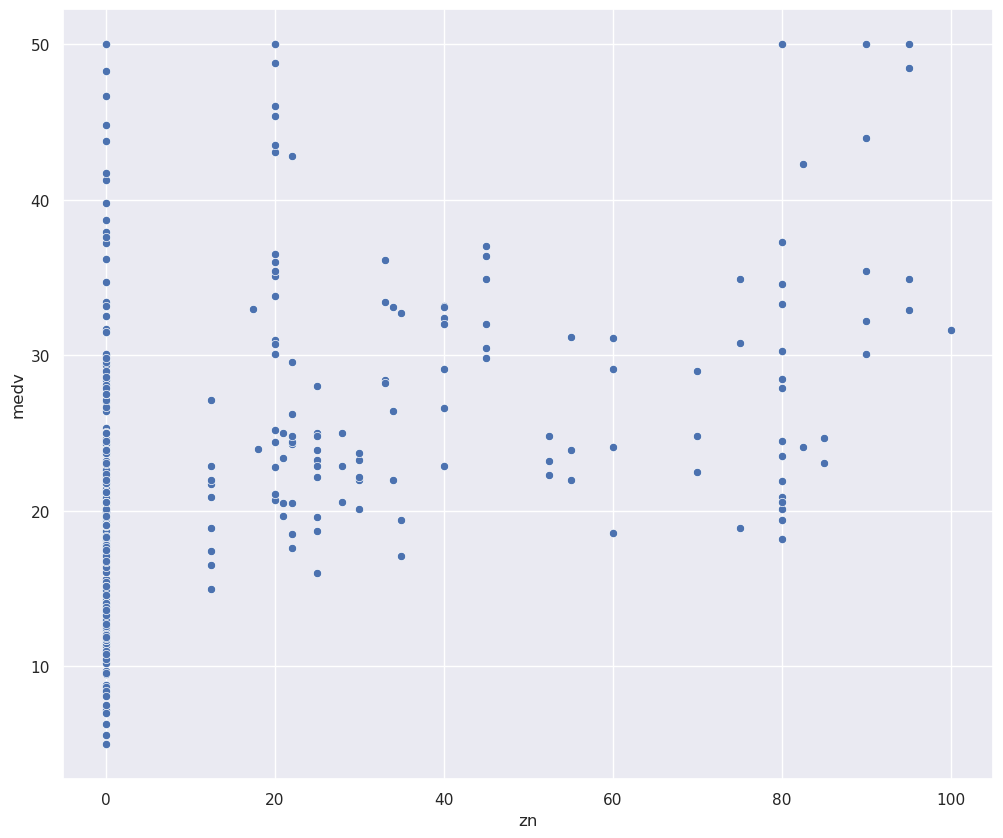

In [19]:
sns.scatterplot(x='zn',y='medv',data=ds)